In [235]:
# CS180 (CS280A): Project 1 starter Python code

# these are just some suggested libraries
# instead of scikit-image you could use matplotlib and opencv to read, write, and display images

import numpy as np
import skimage as sk
import skimage.io as skio

# name of the input file
imname = 'cathedral.jpg'

# read in the image
im = skio.imread(imname)

# convert to double (might want to do this later on to save memory)    
im = sk.img_as_float(im)
    
# compute the height of each part (just 1/3 of total)
height = np.floor(im.shape[0] / 3.0).astype(int)

# separate color channels
b = im[:height]
g = im[height: 2*height]
r = im[2*height: 3*height]

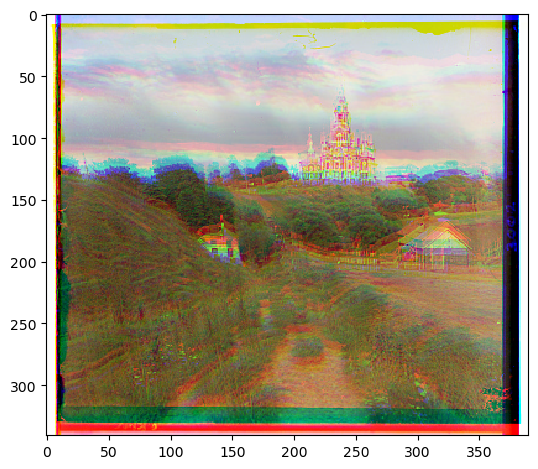

In [239]:
im_out = np.dstack([r, g, b])

im_init_jpg = sk.img_as_ubyte(im_out)

# save the image
fname = f'./to_deliver/cathedralinit.jpg'
skio.imsave(fname, im_init_jpg)

# display the image
skio.imshow(im_out)
skio.show()

In [65]:
def get_NCC(X1,X2):
    return np.sum((X1/np.linalg.norm(X1)) * (X2/np.linalg.norm(X2)))


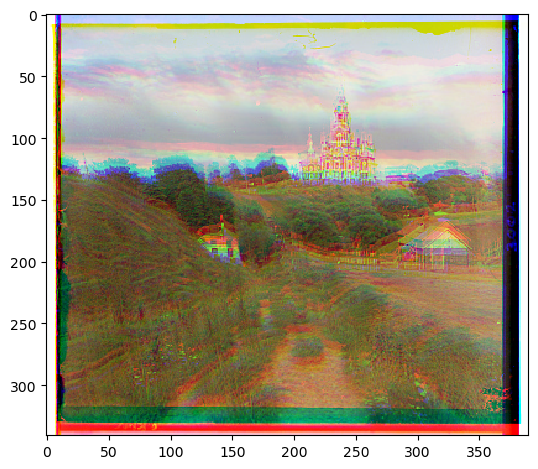

In [73]:
temp = np.dstack([r, g, b])
skio.imshow(temp)

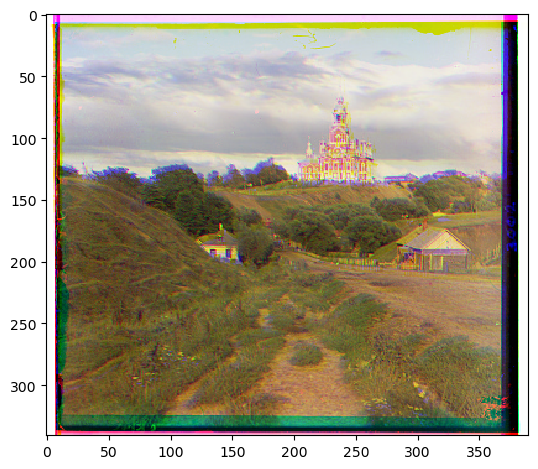

In [122]:
rolled_g = np.roll(g,(1,-1), axis = (0,1))
rolled_r = np.roll(r,(7,-1), axis = (0,1))
temp = np.dstack([rolled_r, rolled_g, b])
skio.imshow(temp)

In [118]:
#adjust brightness

print(np.mean(r))
print(np.mean(g))
print(np.mean(b))



0.5844964902270405
0.5401500923702063
0.44694308432448865


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


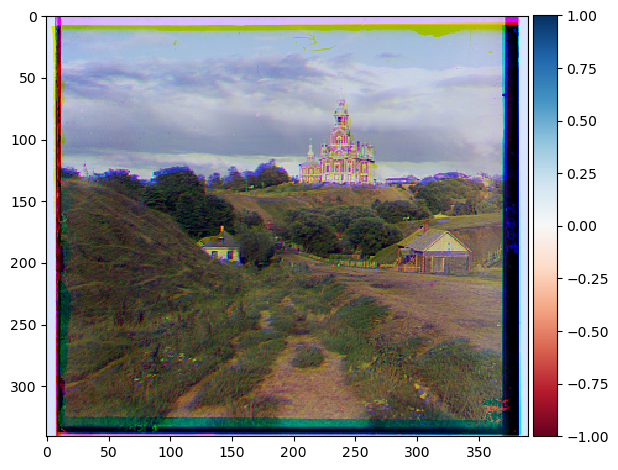

In [240]:
rolled_g = np.roll(g,(1,0), axis = (0,1))
rolled_r = np.roll(r,(8,0), axis = (0,1))

im_out = np.dstack([rolled_r-(np.mean(r)-np.mean(b)), rolled_g-(np.mean(g)-np.mean(b)), b])

im_init_jpg = sk.img_as_ubyte(im_out)

# save the image
fname = f'./to_deliver/cathedral.jpg'
skio.imsave(fname, im_init_jpg)

# display the image
skio.imshow(im_out)
skio.show()

In [234]:
# using y as base, adjust the position and brightness of x
def get_NCC(X1,X2):
    return np.sum((X1/np.linalg.norm(X1)) * (X2/np.linalg.norm(X2)))

def align(x,y):

    best_NCC, best_i, best_j = -1,-1,-1
    v_adjust = x.shape[0]//30
    h_adjust = x.shape[1]//30
    for i in range(-v_adjust,v_adjust+1):
        for j in range(-h_adjust,h_adjust+1):
            rolled_x = np.roll(x,(i,j), axis = (0,1))
            cur_NCC = get_NCC(rolled_x,y)
            if cur_NCC > best_NCC:
                best_i, best_j, best_NCC = i,j,cur_NCC

    rolled_x = np.roll(x, (best_i,best_j), axis = (0,1))
    return rolled_x-(np.mean(x)-np.mean(y))
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


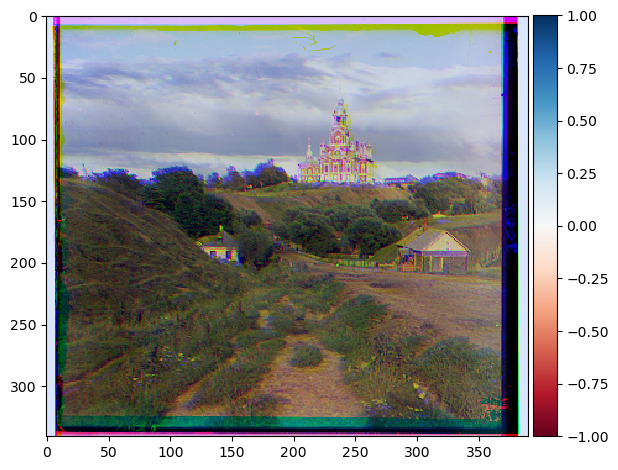

In [124]:
ag = align(g, b)
ar = align(r, b)
im_out = np.dstack([ar, ag, b])
skio.imshow(im_out)
skio.show()

In [209]:
def gaussian_blur(x, kernel = np.array([[1,2,1],
                                        [2,4,2],
                                        [1,2,1]])/16):
    padding = kernel.shape[0]//2
    padded_x = np.pad(x,padding)

    toReturn = np.zeros(x.shape)

    for i in range(toReturn.shape[0]):
        for j in range(toReturn.shape[1]):
            toReturn[i,j] = np.sum(padded_x[i:i+padding+2, 
                                            j:j+padding+2]*kernel)
    
    return toReturn


In [212]:
blur_temp = gaussian_blur(temp[:,:,0])
blur_temp.shape

(341, 390)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


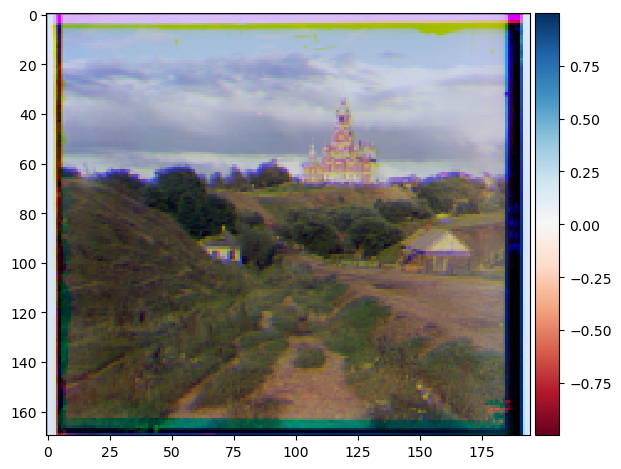

In [203]:
dsed_temp = temp[0:-1:2,0:-1:2,:]
skio.imshow(dsed_temp)
skio.show()

In [216]:
# take input of a list containing one element: the full size image, 
# and the size of pyrdamid needed

def generate_pyramid(pyramid_base, size = 4):
    if size != 1:
        last_layer = pyramid_base[-1]
        blurred_layer = np.dstack([gaussian_blur(last_layer[:,:,0]), 
                                   gaussian_blur(last_layer[:,:,1]), 
                                   gaussian_blur(last_layer[:,:,2])])
        dsed_layer = blurred_layer[0:-1:2,0:-1:2,:]
        pyramid_base.append(dsed_layer)
        generate_pyramid(pyramid_base, size-1)

    return pyramid_base
        

In [231]:
pyramid = generate_pyramid([np.dstack([r, g, b])])

In [232]:
len(pyramid)

4

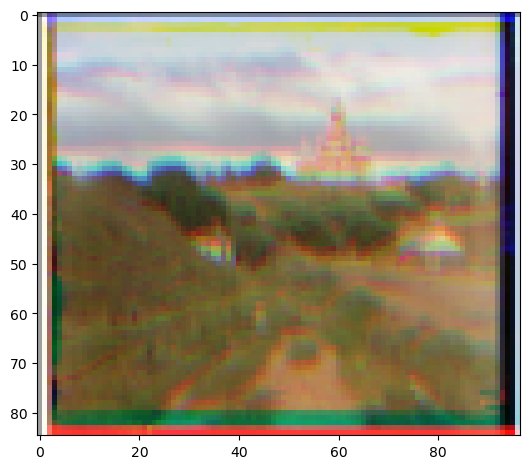

In [233]:
skio.imshow(pyramid[2])

In [ ]:

# align the images
# functions that might be useful for aligning the images include:
# np.roll, np.sum, sk.transform.rescale (for multiscale)

### ag = align(g, b)
### ar = align(r, b)
# create a color image
im_out = np.dstack([ar, ag, b])

# save the image
fname = '/out_path/out_fname.jpg'
skio.imsave(fname, im_out)

# display the image
skio.imshow(im_out)
skio.show()